<a href="https://colab.research.google.com/github/Faskill/GNN-book/blob/main/GNN_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import json
with open('data/relationships_hashed.json', 'rb') as file:
    json_data = json.load(file)

In [95]:
import timeit
#Creating adjacency list from json file
#This function has been modified from the book's function to improve efficiency
def create_adjacency_list(data_dict, suffix=''):
    node_list = set()
    for source_node in list(data_dict.keys()):
        node_list.add(source_node)
        for x in data_dict[source_node]:
            node_list.add(x)
            if x not in data_dict.keys():
                data_dict[x] = [source_node]
            else:
                if source_node not in data_dict[x]:
                    data_dict[x].append(source_node)
    with open("data/adjacency_list_{}.txt".format(suffix),"w+") as file:
        for source_node in list(data_dict.keys()):
            dt = ' '.join(data_dict[source_node])
            file.write("{} {} \n".format(source_node, dt))
    return node_list

In [90]:
node_list = create_adjacency_list(json_data)
len(node_list)

1933

In [96]:
%%timeit -r 4
#Timing our improved function
create_adjacency_list(json_data)
None

35.5 ms ± 146 µs per loop (mean ± std. dev. of 4 runs, 10 loops each)


In [97]:
#Source function from book
def create_adjacency_list2(data_dict, suffix=''):

    list_of_nodes = []
    for source_node in list(data_dict.keys()): #A
        if source_node not in list_of_nodes:
            list_of_nodes.append(source_node)
        for y in data_dict[source_node]: #B
            if y not in list_of_nodes: #B
                list_of_nodes.append(y) #B
            if y not in data_dict.keys(): #B
                data_dict[y]=[source_node] #B
            else: #B
                if source_node not in data_dict[y]: #B
                    data_dict[y].append(source_node) #B
                else: continue #B
    g= open("data/adjacency_list_{}.txt".format(suffix),"w+") #C
    for source_node in list(data_dict.keys()): #D
        dt = ' '.join(data_dict[source_node]) #E
        g.write("{} {} \n".format(source_node, dt)) #G
    g.close
    return list_of_nodes

In [76]:
node_list = create_adjacency_list2(json_data)
len(node_list)

1933

In [98]:
%%timeit -r 4
create_adjacency_list2(json_data)
None

210 ms ± 4.33 ms per loop (mean ± std. dev. of 4 runs, 1 loop each)


The modified version is 6x faster

In [4]:
#Optimized function
def create_edge_list(data_dict, suffix=''):
    edge_list_file = open("data/edge_list_{}.txt".format(suffix),"w+")
    list_of_edges = set()
    list_of_nodes = set()

    for source_node in list(data_dict.keys()):
        list_of_nodes.add(source_node)
        connections = data_dict[source_node]

        for destination_node in connections:
            list_of_nodes.add(destination_node)
            _tmp = len(list_of_edges)
            list_of_edges.add((source_node, destination_node))
            if len(list_of_edges) != _tmp:
                edge_list_file.write("{} {}".format(source_node, destination_node))
        edge_list_file.close
    return list_of_edges, list_of_nodes

In [5]:
#Optimized function (slight variation)
def create_edge_list2(data_dict, suffix=''):
    edge_list_file = open("data/edge_list_{}.txt".format(suffix),"w+")
    list_of_edges = set()
    list_of_nodes = set()

    for source_node in list(data_dict.keys()):
        list_of_nodes.add(source_node)
        connections = data_dict[source_node]

        for destination_node in connections:
            list_of_nodes.add(destination_node)
            if (source_node, destination_node) not in list_of_edges:
                edge_list_file.write("{} {} \n".format(source_node, destination_node))
                list_of_edges.add((source_node, destination_node))
    edge_list_file.close
    return list_of_edges, list_of_nodes

In [99]:
#Function from the book
def create_edge_list3(data_dict, suffix=''):
    edge_list_file = open("data/edge_list_{}.txt".format(suffix),"w+")
    list_of_edges = []
    list_of_nodes_all = []
    for source_node in list(data_dict.keys()):
        if source_node not in list_of_nodes_all:
            list_of_nodes_all.append(source_node)
            list_of_connects = data_dict[source_node]
        for destination_node in list_of_connects: #A
            if destination_node not in list_of_nodes_all:
                list_of_nodes_all.append(destination_node)
            if {source_node, destination_node} not in list_of_edges:
                edge_list_file.write("{} {} \n".format(source_node, destination_node)) #C
                list_of_edges.append({source_node, destination_node})
            else: continue
    edge_list_file.close
    return list_of_edges, list_of_nodes_all

In [ ]:
%%timeit -r 4 -n 1000
create_edge_list(json_data)
None

42.6 ms ± 307 µs per loop (mean ± std. dev. of 4 runs, 1000 loops each)


In [106]:
%%timeit -r 4
create_edge_list2(json_data)
None

58.8 ms ± 506 µs per loop (mean ± std. dev. of 4 runs, 10 loops each)


In [103]:
%%timeit -r 4
create_edge_list3(json_data)
None

625 ms ± 1.34 ms per loop (mean ± std. dev. of 4 runs, 1 loop each)


Our second optimized function speeds up calculation by 11x.

## Data Loading 

In [176]:
import networkx as nx
import pandas as pd
import numpy as np
from itertools import count
import matplotlib.pyplot as plt

with open('data/relationships_hashed.json', 'rb') as file:
    json_data = json.load(file)

In [108]:
node_attr = pd.read_csv('data/node_attributes_hashed.csv')
node_attr

,position_type,company_type,hashedid,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,engineer,tech,058b92d6c47c4f8e29b302b30a1fff4a21ba9d36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,executive_or_management,finance,e943ba6d3c0eb8589df32a873ab5772c8f77c68f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,marketing_sales,Unknown,07722a6692fb28485ddaf84979322fb5a78d0926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,marketing_sales,Unknown,eb319e0714095bc9f9517317e9040f125b8de8d4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,misc,misc,acddbb2edb475d3a5fd127075dc146eb9ba94e0e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,misc,misc,d2d878318aaa8825d9e0e43b162ae0b33a9a90ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,executive_or_management,nonprofit_ngo,3e0a9701ee6796753d601a8d9ba551fec1e9b8d3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1944,education,education,dbfb54497fe275982736b278a69ac0d6554469d0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945,misc,tech,ef0a4531dbc7fd4b16765ea67bbbac66c496f392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
node_attr = node_attr[["position_type","company_type","hashedid"]]
node_attr.head()

,position_type,company_type,hashedid
0,engineer,tech,058b92d6c47c4f8e29b302b30a1fff4a21ba9d36
1,executive_or_management,finance,e943ba6d3c0eb8589df32a873ab5772c8f77c68f
2,marketing_sales,Unknown,07722a6692fb28485ddaf84979322fb5a78d0926
3,marketing_sales,Unknown,eb319e0714095bc9f9517317e9040f125b8de8d4
4,misc,misc,acddbb2edb475d3a5fd127075dc146eb9ba94e0e


In [110]:
node_attr.loc[(node_attr.position_type.isna()) | (node_attr.company_type.isna())]

,position_type,company_type,hashedid


In [111]:
node_attr.set_index('hashedid', inplace=True)
node_list = create_adjacency_list(json_data)
print(len(node_list))

1933


In [112]:
node_list = create_adjacency_list(json_data)
print(len(node_attr), len(node_list))
node_attr = node_attr[node_attr.index.isin(node_list)]
print(len(node_attr))
node_attributes = node_attr.to_dict(orient='index')

1947 1933
1931


In [113]:
nodes_with_no_attributes = node_list - set(node_attr.index)
nodes_with_no_attributes

{'549eddd71c0015ad4e1e8d7ee5084316bf8311c2',
 'c0470c980335579cfbe767451a1979a52b9e9c66'}

In [114]:
#Updating function to ignore nodes with no attributes
def create_adjacency_list(data_dict, suffix=''):
    node_list = set()
    for source_node in list(data_dict.keys()):
        if source_node not in nodes_with_no_attributes:
            node_list.add(source_node)

    for x in data_dict[source_node]:
        if x not in nodes_with_no_attributes:
            node_list.add(x)
            if x not in data_dict.keys():
                data_dict[x] = [source_node]
            else:
                if source_node not in data_dict[x]:
                    data_dict[x].append(source_node)
        else:
            data_dict.pop(source_node)
    g= open("data/adjacency_list_{}.txt".format(suffix),"w+")
    for source_node in list(data_dict.keys()):
        if source_node not in nodes_with_no_attributes:
            dt = ' '.join(data_dict[source_node])
            g.write("{} {} \n".format(source_node, dt))
    g.close
    return node_list

In [115]:
node_list = create_adjacency_list(json_data)
len(node_list)

1931

In [182]:
#Setting node attributes
social_graph = nx.read_adjlist('data/adjacency_list_.txt')
nx.set_node_attributes(social_graph, node_attributes)
print(social_graph.number_of_nodes(), social_graph.number_of_edges())

1931 12239


In [183]:
len([c for c in nx.connected_components(social_graph)])

sorted_components = sorted(list((len(c) for c in nx.connected_components(social_graph))), reverse=True)
set(sorted_components)

{1, 2, 3, 4, 1698}

In [184]:
groups = set(nx.get_node_attributes(social_graph,'position_type').values())
mapping = dict(zip(sorted(groups),count()))
values = [mapping[node_attributes[node]['position_type']] if node in node_attributes.keys() else .25 \
          for node in social_graph.nodes()]

In [186]:
mapping

{'Unknown': 0,
 'education': 1,
 'engineer': 2,
 'executive_or_management': 3,
 'finance': 4,
 'legal': 5,
 'marketing_sales': 6,
 'misc': 7,
 'operations_supplychain': 8}

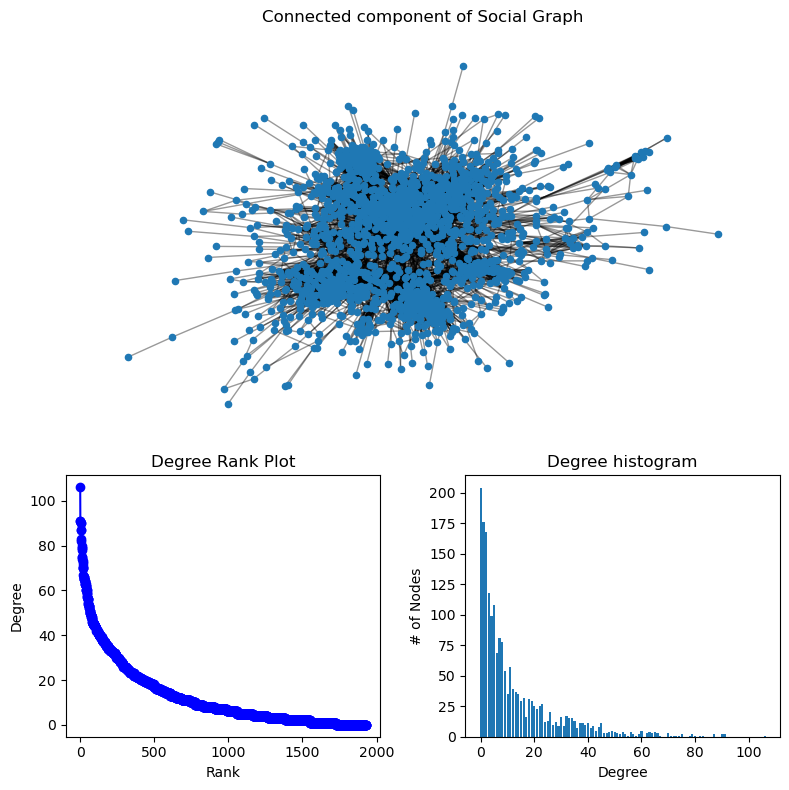

In [119]:
import matplotlib.pyplot as plt

## Modified from NetworkX documentation.
fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])
# ‘Gcc’ stands for ‘graph connected component’
Gcc = social_graph.subgraph(sorted(nx.connected_components(social_graph), key=len,
reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected component of Social Graph")
ax0.set_axis_off()
degree_sequence = sorted([d for n, d in social_graph.degree()], reverse=True)
ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")
ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
fig.tight_layout()
plt.show()

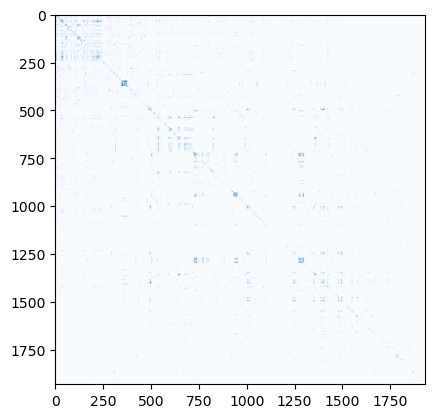

In [120]:
#Adjacency matrix of our graph
plt.imshow(nx.to_numpy_array(social_graph), aspect='equal',cmap='Blues')
plt.show()

## Importing our graph object into Pytorch Geometric (PyG)

### 1. Using import from NetworkX

In [121]:
import torch
from torch_geometric.data import Data
from torch_geometric.data import InMemoryDataset
from torch_geometric import utils

In [122]:
data = utils.from_networkx(social_graph)
data

Data(edge_index=[2, 24478], position_type=[1931], company_type=[1931], num_nodes=1931)

### 2. Importing from raw files 

In [138]:
social_graph = nx.read_edgelist('data/edge_list_.txt')

list_of_nodes = list(set(list(social_graph)))
indices_of_nodes = [list_of_nodes.index(x) for x in list_of_nodes]
node_to_index = dict(zip(list_of_nodes, indices_of_nodes))
index_to_node = dict(zip(indices_of_nodes, list_of_nodes))

list_edges = nx.convert.to_edgelist(social_graph)
list_edges = list(list_edges)

named_edge_list_0 = [x[0] for x in list_edges]
named_edge_list_1 = [x[1] for x in list_edges]

indexed_edge_list_0 = [node_to_index[x] for x in named_edge_list_0]
indexed_edge_list_1 = [node_to_index[x] for x in named_edge_list_1]

x = torch.FloatTensor([[1] for x in range(len(list_of_nodes))])
y = torch.FloatTensor([1]*974 + [0]*973)
y = y.long()

edge_index = torch.tensor([indexed_edge_list_0, indexed_edge_list_1])

train_mask = torch.zeros(len(list_of_nodes), dtype=torch.uint8)
train_mask[:int(0.8 * len(list_of_nodes))] = 1 #train only on the 80% nodes
test_mask = torch.zeros(len(list_of_nodes), dtype=torch.uint8) #test on 20 % nodes
test_mask[- int(0.2 * len(list_of_nodes)):] = 1

train_mask = train_mask.bool()
test_mask = test_mask.bool()

data = Data(x=x, y=y, edge_index=edge_index, train_mask=train_mask, test_mask=test_mask)

## 3. Creating Pyg Dataset from custom class

In [145]:
class MyOwnDataset(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None):  #A
        super(MyOwnDataset, self).__init__(root, transform, pre_transform)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self): #B
        return []

    @property
    def processed_file_names(self): #C
        return ['../test.dataset']
    
    def download(self): #D
        # Download to `self.raw_dir`.
        pass

    def process(self): #E
        # Read data into `Data` list.
        data_list = []
        
        eg = nx.read_adjlist('data/adjacency_list_.txt')
        node_attr = pd.read_csv('data/node_attributes_hashed.csv', encoding = "ISO-8859-1")
        node_attr = node_attr[['hashedid','company_type','position_type']]

        node_attr = node_attr.set_index('hashedid')
        node_attr.tail()
        attribute_dict = node_attr.to_dict(orient='index')

        nx.set_node_attributes(eg, attribute_dict)

        eg = eg.subgraph(sorted(nx.connected_components(eg), key=len, reverse=True)[0])  #A

        groups = set(nx.get_node_attributes(eg,'company_type').values())

        nx.get_node_attributes(eg,'company_type')
        mapping = dict(zip(sorted(groups),count()))

        attr_values = [mapping[attribute_dict[node]['company_type']] for node in eg.nodes()]
        
        list_of_nodes = list(set(list(eg)))
        indices_of_nodes = [list_of_nodes.index(x) for x in list_of_nodes]

        node_to_index = dict(zip(list_of_nodes, indices_of_nodes))
        index_to_node = dict(zip(indices_of_nodes, list_of_nodes))
        
        list_edges = nx.convert.to_edgelist(eg)
        list_edges = list(list_edges)
        named_edge_list_0 = [x[0] for x in list_edges]
        named_edge_list_1 = [x[1] for x in list_edges]

        _indexed_edge_list_0 = [node_to_index[x] for x in named_edge_list_0]
        _indexed_edge_list_1 = [node_to_index[x] for x in named_edge_list_1]

        indexed_edge_list_0 = _indexed_edge_list_0 + _indexed_edge_list_1
        indexed_edge_list_1 = _indexed_edge_list_1 + _indexed_edge_list_0
        
        x = torch.FloatTensor([[1] for x in range(len(list_of_nodes))]) 
        y = torch.FloatTensor(attr_values)
        y = y.long()
        
        edge_index = torch.tensor([indexed_edge_list_0, indexed_edge_list_1])
        
        data_example = Data(x=x, y=y, edge_index=edge_index) 

        data_list.append(data_example)
        
        data, slices = self.collate(data_list) 
        torch.save((data, slices), self.processed_paths[0]) 

## Creating Embeddings

In [155]:
social_graph = nx.read_adjlist('data/adjacency_list_.txt')
nx.set_node_attributes(social_graph, node_attributes)


#Selecting only main component
social_graph = social_graph.subgraph(sorted(nx.connected_components(social_graph), key=len, reverse=True)[0])  #A

social_graph.number_of_edges(), social_graph.number_of_nodes()

(12222, 1698)

In [159]:
from itertools import count
groups = set(nx.get_node_attributes(social_graph,'company_type').values())
nx.get_node_attributes(social_graph,'company_type')
mapping = dict(zip(sorted(groups),count()))
attr_values = [mapping[node_attributes[node]['company_type']] for node in social_graph.nodes()]

### 1. Node2Vec Embeddings

In [160]:
from node2vec import Node2Vec
node2vec = Node2Vec(social_graph, dimensions=64, walk_length=30, num_walks=200, workers=4)

model = node2vec.fit(window=10, min_count=1, batch_words=4)

model.wv.save_word2vec_format('data/EMBEDDING_FILENAME')

Computing transition probabilities:   0%|          | 0/1698 [00:00<?, ?it/s]

Generating walks (CPU: 3): 100%|██████████| 50/50 [00:14<00:00,  3.40it/s]


In [169]:
with open("data/EMBEDDING_FILENAME", "r") as social:
    lines = social.readlines()
    
embedded_lines = [x.split(' ')[1:] for x in lines[1:]] #A
n2v_embeddings = []

for line in embedded_lines:
    new_line = [float(y) for y in line] #B
    n2v_embeddings.append(new_line)

### TSNE Visualization

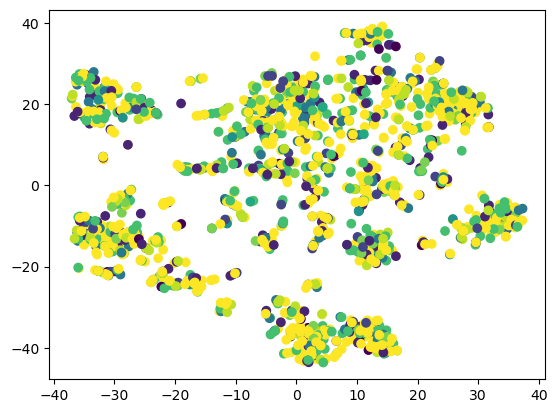

In [170]:
from sklearn.manifold import TSNE

tsne_model = TSNE(learning_rate=800, metric='cosine', n_iter=500)

tsne_features = tsne_model.fit_transform(np.array(n2v_embeddings))

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

plt.scatter(xs,ys, c=attr_values)
plt.show()

### 3. GNN Embeddings

In [ ]:
social_graph = nx.read_adjlist('data/adjacency_list_.txt')
nx.set_node_attributes(social_graph, node_attributes)

In [191]:
class MyOwnDataset(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None):  #A
        super(MyOwnDataset, self).__init__(root, transform, pre_transform)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self): #B
        return []

    @property
    def processed_file_names(self): #C
        return ['../test.dataset']
    
    def download(self): #D
        # Download to `self.raw_dir`.
        pass

    def process(self): #E
        # Read data into `Data` list.
        data_list = []
        
        eg = nx.read_adjlist('data/adjacency_list_.txt')
        node_attr = pd.read_csv('data/node_attributes_hashed.csv', encoding = "ISO-8859-1")
        node_attr = node_attr[['hashedid','company_type','position_type']]

        node_attr = node_attr.set_index('hashedid')
        node_attr.tail()
        attribute_dict = node_attr.to_dict(orient='index')

        nx.set_node_attributes(eg, attribute_dict)

        eg = eg.subgraph(sorted(nx.connected_components(eg), key=len, reverse=True)[0])  #A

        groups = set(nx.get_node_attributes(eg,'company_type').values())

        nx.get_node_attributes(eg,'company_type')
        mapping = dict(zip(sorted(groups),count()))

        attr_values = [mapping[attribute_dict[node]['company_type']] for node in eg.nodes()]
        
        list_of_nodes = list(set(list(eg)))
        indices_of_nodes = [list_of_nodes.index(x) for x in list_of_nodes]

        node_to_index = dict(zip(list_of_nodes, indices_of_nodes))
        index_to_node = dict(zip(indices_of_nodes, list_of_nodes))
        
        list_edges = nx.convert.to_edgelist(eg)
        list_edges = list(list_edges)
        named_edge_list_0 = [x[0] for x in list_edges]
        named_edge_list_1 = [x[1] for x in list_edges]

        _indexed_edge_list_0 = [node_to_index[x] for x in named_edge_list_0]
        _indexed_edge_list_1 = [node_to_index[x] for x in named_edge_list_1]

        indexed_edge_list_0 = _indexed_edge_list_0 + _indexed_edge_list_1
        indexed_edge_list_1 = _indexed_edge_list_1 + _indexed_edge_list_0
        
        x = torch.FloatTensor([[1] for x in range(len(list_of_nodes))]) 
        y = torch.FloatTensor(attr_values)
        y = y.long()
        
        edge_index = torch.tensor([indexed_edge_list_0, indexed_edge_list_1])
        
        data_example = Data(x=x, y=y, edge_index=edge_index) 

        data_list.append(data_example)
        
        data, slices = self.collate(data_list) 
        torch.save((data, slices), self.processed_paths[0]) 

In [192]:


dataset = MyOwnDataset('')
data = dataset[0]

print()
print(data)
print('===========================================================================================================')

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')



Data(x=[1698, 1], edge_index=[2, 24444], y=[1698])
Number of nodes: 1698
Number of edges: 24444
Average node degree: 14.40
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


Processing...
Done!
/home/faskill/miniconda3/envs/gnn-book/lib/python3.10/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)
/home/faskill/miniconda3/envs/gnn-book/lib/python3.10/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'contains_self_loops' is deprecated, use 'has_self_loops' instead
  warnings.warn(out)


In [193]:
def visualize(h, color, oute):
    '''Helper function for visualization.
       credit: matthias.fey@tu-dortmund.de'''

    z = TSNE(n_components=2).fit_transform(oute.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

In [196]:
from torch_geometric.data import Data 
from torch_geometric.data import InMemoryDataset
from torch_geometric import utils
from torch_geometric.nn import GCNConv, GATConv, GraphConv
import torch_geometric.nn as pyg_nn
import torch_geometric.utils as pyg_utils
import torch
import torch.nn.functional as F
import torch.nn as nn

class SimpleGNN(torch.nn.Module):
    ''' 
        A GNN architecture modified to output embeddings.

        The GNN layers used are built into PyG and can be swappable with
        at least GATConv, GraphConv, and GCNConv.

        The architecture consists of:
        -- 3 GCNConv layers
          - with an activation layer, a dropout layer, and a normalization layer
        -- Multilayer Perceptron layers
          - One linear layer, one dropout layer, and one linear layer

        For this application, we don't use the MLP layers or activation function.
        The output from the message passing layers is directly applied as embeddings. 

    '''

    def __init__(self):
        super(SimpleGNN, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16) # Parameter here can be adjusted; Model can be switched between GCNConv, GATConv, or GraphConv
        self.conv2 = GCNConv(16, 16) # Parameter here can be adjusted; Model can be switched between GCNConv, GATConv, or GraphConv
        self.conv3 = GCNConv(16, 16) # Parameter here can be adjusted; Model can be switched between GCNConv, GATConv, or GraphConv
        self.lns = nn.LayerNorm(16) # Parameter here can be adjusted;
        self.post_mp = nn.Sequential(
            nn.Linear(16, 16), nn.Dropout(0.25), # Parameters here can be adjusted;
            nn.Linear(16, 64)) # Parameters here can be adjusted; The right hand parameter, here, will be the dimension of the output embeddings.

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p= .25,training=self.training)
        x = self.lns(x)
        
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p= .25,training=self.training)
        x = self.lns(x)

        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p= .25,training=self.training)

        x = self.post_mp(x)

        return x ,F.log_softmax(x, dim=1)


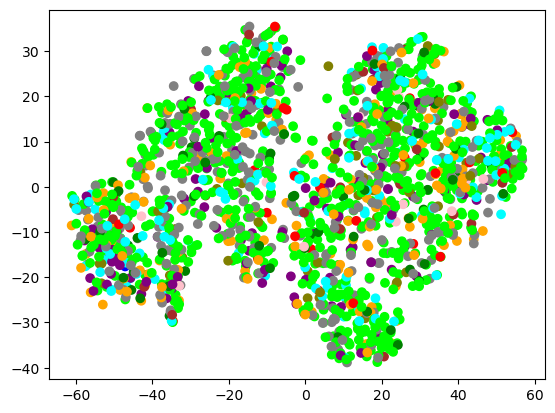

In [197]:

model = SimpleGNN()
embedding, out = model(data)

color_list = ["red", "orange", "green", "blue", "purple", "brown", "pink", "gray", "olive", "cyan", "lime"]
colors = []
colors += [color_list[y] for y in data.y.detach().numpy()]

xs, ys = zip(*TSNE().fit_transform(embedding.detach().numpy()))

plt.scatter(xs, ys, c=colors)

In [198]:
embedding

tensor([[-0.3939, -0.1187, -0.2027,  ...,  0.5655, -0.0012,  0.2883],
        [-0.6898, -0.1066, -0.3669,  ...,  0.4083,  0.1909,  0.1066],
        [-0.1089,  0.1770,  0.1832,  ...,  0.0278,  0.0585, -0.0500],
        ...,
        [-0.5094,  0.2543,  0.0634,  ...,  0.1576, -0.0706,  0.0030],
        [-0.1321, -0.4548, -0.1441,  ...,  0.4270, -0.0079,  0.2439],
        [-0.2960, -0.6667, -0.1201,  ...,  0.5350,  0.1081,  0.3118]],
       grad_fn=<AddmmBackward0>)

In [ ]:
## 3. 